In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
a = 2
b = 100
n = 10000
data = np.random.uniform(a, b, n)

(array([ 977., 1054.,  979., 1054.,  997.,  985., 1027.,  961.,  966.,
        1000.]),
 array([ 2.02008257, 11.81584011, 21.61159766, 31.40735521, 41.20311276,
        50.9988703 , 60.79462785, 70.5903854 , 80.38614294, 90.18190049,
        99.97765804]),
 <a list of 10 Patch objects>)

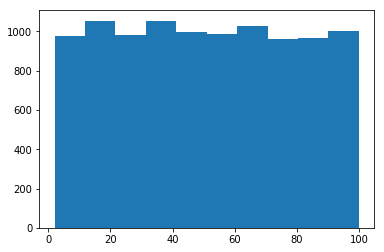

In [17]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [24]:
data = np.random.randn(100000)

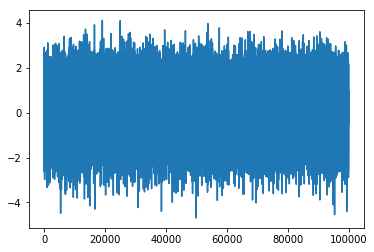

In [25]:
x = range(1,100001)
plt.plot(x, data)

(array([1.5000e+01, 1.8600e+02, 1.7860e+03, 1.0190e+04, 2.6377e+04,
        3.3632e+04, 2.0583e+04, 6.2610e+03, 9.1700e+02, 5.3000e+01]),
 array([-4.69204374, -3.81120353, -2.93036331, -2.04952309, -1.16868287,
        -0.28784265,  0.59299757,  1.47383779,  2.35467801,  3.23551822,
         4.11635844]),
 <a list of 10 Patch objects>)

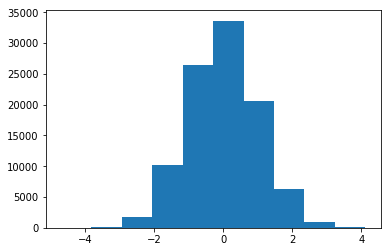

In [26]:
plt.hist(data)

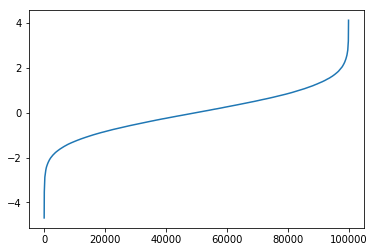

In [28]:
plt.plot(x,sorted(data))

(array([1.900e+01, 1.710e+02, 7.810e+02, 2.028e+03, 3.083e+03, 2.527e+03,
        1.084e+03, 2.650e+02, 3.900e+01, 3.000e+00]),
 array([-3.78433207, -1.78626468,  0.2118027 ,  2.20987009,  4.20793747,
         6.20600486,  8.20407224, 10.20213963, 12.20020701, 14.1982744 ,
        16.19634178]),
 <a list of 10 Patch objects>)

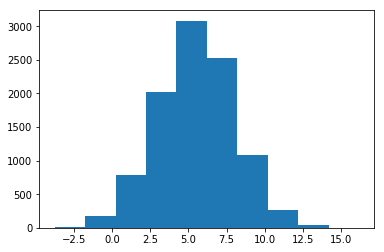

In [32]:
mu = 5.5
sd = 2.5
data = mu + sd * np.random.randn(10000)
plt.hist(data)

In [33]:
data = np.random.randn(2, 4)
data

array([[-0.20074301,  0.61886597,  0.43443161, -0.94060749],
       [ 0.06907043,  0.64881872,  0.82309155,  0.96071431]])

### Simulación de Monte Carlo

* Generamos dos números aleatorios uniforme entre 0 y 1
* Calculamos x * x + y * y
 * Si el valor es inferior a 1 -> estamos dentro del círculo
 * Si el vlaor es menor a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del circulo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer detro del circulo.
* Usamos dicha probabilidad para aproximar el valor de pi
* Repetimos el experimento un número sufuciente de veces, para obtener diferentes aproximaciones de pi

* Calculamos el promedio de los experimentos anteriores para dar un valor final de pi

In [38]:
def pi_montecarlo(n, ite):
    pi_avg = 0

    pi_value_list = []

    for i in range(ite):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <=1:
                value +=1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg +=pi_value
    pi = pi_avg/ite
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

    

3.1418719999999984


(3.1418719999999984, [<matplotlib.lines.Line2D at 0x1306d81b940>])

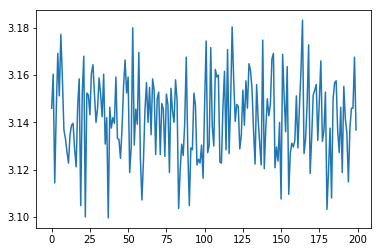

In [39]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [48]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }

)

In [49]:
data.head()

,A,B,C
0,0.790003,6.047079,12.666921
1,1.218146,3.773393,13.972092
2,-0.446171,5.516554,21.979157
3,-2.148101,2.714983,5.033963
4,-0.983974,1.749971,19.749617


In [50]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001485,1.494447,18.505131
std,0.999296,2.501607,7.797043
min,-4.585885,-10.175870,5.000000
25%,-0.676425,-0.190815,11.751079
50%,-0.002110,1.495378,18.503401
75%,0.673242,3.184020,25.267007
max,4.854198,13.205633,31.999959


(array([1.22000e+02, 3.39300e+03, 3.61080e+04, 1.70018e+05, 3.44419e+05,
        3.05868e+05, 1.18649e+05, 2.00020e+04, 1.38200e+03, 3.90000e+01]),
 array([-4.58588531, -3.64187694, -2.69786857, -1.7538602 , -0.80985183,
         0.13415654,  1.07816491,  2.02217327,  2.96618164,  3.91019001,
         4.85419838]),
 <a list of 10 Patch objects>)

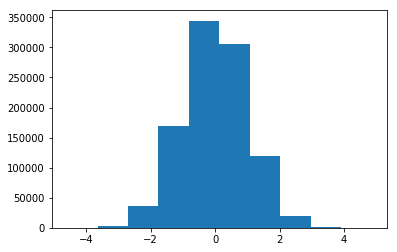

In [51]:
plt.hist(data['A'])

(array([8.70000e+01, 2.43900e+03, 2.90490e+04, 1.45440e+05, 3.26203e+05,
        3.23741e+05, 1.43018e+05, 2.76020e+04, 2.34200e+03, 7.90000e+01]),
 array([-10.17586968,  -7.83771946,  -5.49956924,  -3.16141902,
         -0.8232688 ,   1.51488142,   3.85303164,   6.19118186,
          8.52933208,  10.8674823 ,  13.20563252]),
 <a list of 10 Patch objects>)

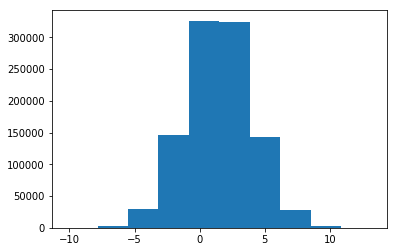

In [52]:
plt.hist(data['B'])

(array([ 99677., 100097., 100615., 100019.,  99488.,  99663., 100049.,
        100018., 100088., 100286.]),
 array([ 5.00000043,  7.69999631, 10.39999218, 13.09998805, 15.79998392,
        18.4999798 , 21.19997567, 23.89997154, 26.59996741, 29.29996328,
        31.99995916]),
 <a list of 10 Patch objects>)

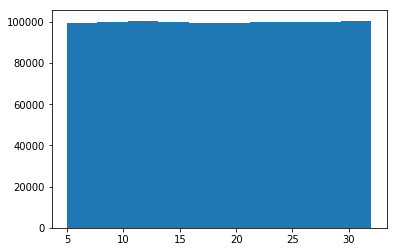

In [54]:
plt.hist(data['C'])

In [55]:
data = pd.read_csv("./datasets/customer-churn-model/Customer Churn Model.txt")

In [57]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [58]:
column_names = data.columns.tolist()

In [59]:
a = len(column_names)
a

21

In [64]:
new_data = pd.DataFrame(
    {
        "Column Name" : column_names,
        'A' : np.random.randn(a),
        'B' : 1.5 + 2.5 * np.random.randn(a),
        'C' : np.random.uniform(5, 32, a)
        
    }, index = range(42, 42 + a)

)

In [65]:
new_data.head()

,Column Name,A,B,C
42,State,0.356814,3.072662,13.790194
43,Account Length,-0.987668,2.804518,19.425757
44,Area Code,-0.131161,-1.888464,23.004736
45,Phone,0.149592,4.659887,18.368150
46,Int'l Plan,-1.463500,0.867173,8.212209
